In [299]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime as dt
from matplotlib.pyplot import figure

In [300]:
orderDetails = pd.read_excel(r'Worksheet in E-Commerce _Command Center (1).xlsm')
profit = pd.read_excel(r'Worksheet in E-Commerce _Command Center (2).xlsm')
target = pd.read_excel(r'Worksheet in E-Commerce _Command Center (3).xlsm')
profit2 = pd.merge(orderDetails,profit, how= 'inner',on='Order ID')
profit2=profit2.set_index('Order ID')


profit2.head()

,Order Date,CustomerName,State,City,Amount,Profit,Quantity,Category,Sub-Category
Order ID,,,,,,,,,
B-25601,2018-01-04 00:00:00,Bharat,Gujarat,Ahmedabad,1275,-1148,7,Furniture,Bookcases
B-25601,2018-01-04 00:00:00,Bharat,Gujarat,Ahmedabad,66,-12,5,Clothing,Stole
B-25601,2018-01-04 00:00:00,Bharat,Gujarat,Ahmedabad,8,-2,3,Clothing,Hankerchief
B-25601,2018-01-04 00:00:00,Bharat,Gujarat,Ahmedabad,80,-56,4,Electronics,Electronic Games
B-25602,2018-01-04 00:00:00,Pearl,Maharashtra,Pune,168,-111,2,Electronics,Phones


In [301]:
groupbyState = profit2.groupby('State')
groupbyState = groupbyState.Profit.agg([sum]).reset_index()
print(groupbyState.rename(columns={'sum':'Profit'}))
groupbyState['sum'].idxmin()

                State  Profit
0      Andhra Pradesh    -496
1               Bihar    -321
2               Delhi    2987
3                 Goa     370
4             Gujarat     465
5             Haryana    1325
6    Himachal Pradesh     656
7   Jammu and Kashmir       8
8           Karnataka     645
9             Kerala     1871
10     Madhya Pradesh    5551
11        Maharashtra    6176
12           Nagaland     148
13             Punjab    -609
14          Rajasthan    1257
15             Sikkim     401
16         Tamil Nadu   -2216
17      Uttar Pradesh    3237
18        West Bengal    2500


16

<AxesSubplot:title={'center':'Profit Vs City'}, xlabel='State', ylabel='Profit'>

<Figure size 432x288 with 0 Axes>

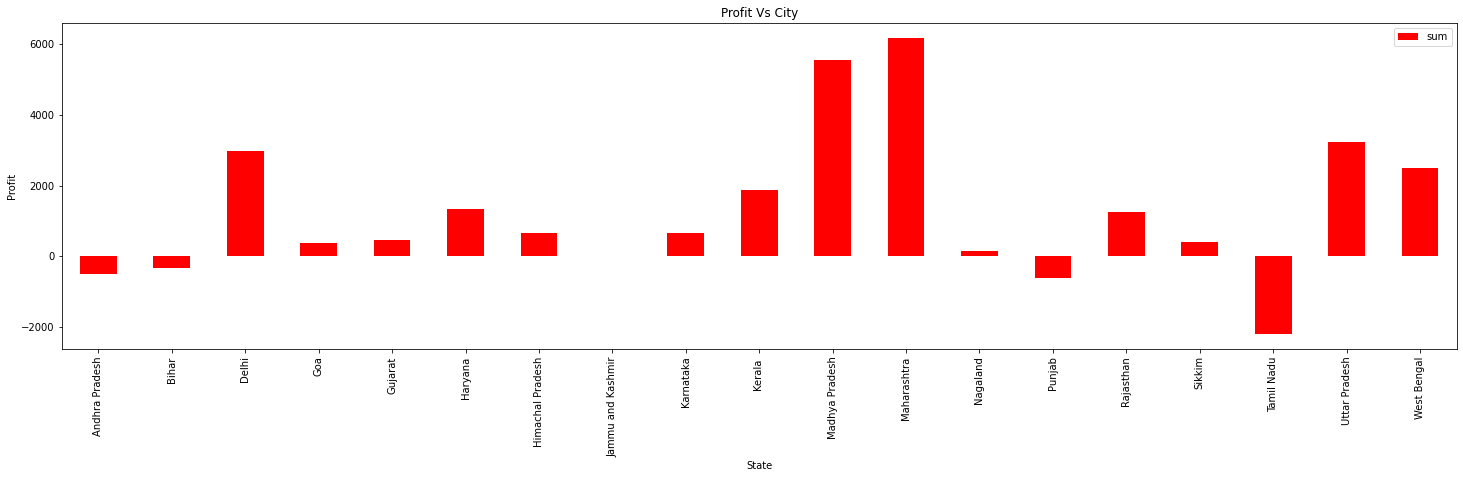

In [302]:

fig = plt.figure()
groupbyID = groupbyID.reset_index(drop = True)
groupbyID.plot(kind = 'bar',
        x = 'State',
        y = 'sum',
        color = 'red',figsize=(25, 6),title='Profit Vs City',xlabel='State',ylabel='Profit')


In [303]:
profit2['Order Date'] = pd.to_datetime(profit2['Order Date'])
profit2['mnth_yr'] = profit2['Order Date'].apply(lambda x: x.strftime('%Y-%m')) 
months= [month for month,profit2 in profit2.groupby('mnth_yr')]

profit2.tail()

,Order Date,CustomerName,State,City,Amount,Profit,Quantity,Category,Sub-Category,mnth_yr
Order ID,,,,,,,,,,
B-26099,2019-03-30,Bhishm,Maharashtra,Mumbai,835,267,5,Electronics,Phones,2019-03
B-26099,2019-03-30,Bhishm,Maharashtra,Mumbai,2366,552,5,Clothing,Trousers,2019-03
B-26100,2019-03-31,Hitika,Madhya Pradesh,Indore,828,230,2,Furniture,Chairs,2019-03
B-26100,2019-03-31,Hitika,Madhya Pradesh,Indore,34,10,2,Clothing,T-shirt,2019-03
B-26100,2019-03-31,Hitika,Madhya Pradesh,Indore,72,16,2,Clothing,Shirt,2019-03


In [304]:
groupbyDate = profit2.groupby(['mnth_yr'])
groupbyDate= groupbyDate.Profit.agg(['sum']).reset_index()

groupbyDate=groupbyDate.sort_values(by="mnth_yr")
#print(groupbyDate.rename(columns={'sum':'Profit'}))
print(groupbyDate)


    mnth_yr   sum
0   2018-01 -3296
1   2018-02   685
2   2018-03   669
3   2018-04 -1043
4   2018-05  -891
5   2018-06 -3759
6   2018-07 -2065
7   2018-08 -1059
8   2018-09 -3509
9   2018-10  5979
10  2018-11  4955
11  2018-12  1535
12  2019-01  8655
13  2019-02  2291
14  2019-03  6633
15  2019-04  1295
16  2019-05   943
17  2019-06   700
18  2019-07   975
19  2019-08   594
20  2019-09  1597
21  2019-10  1892
22  2019-11   122
23  2019-12    57


Text(0.5, 0, 'Month')

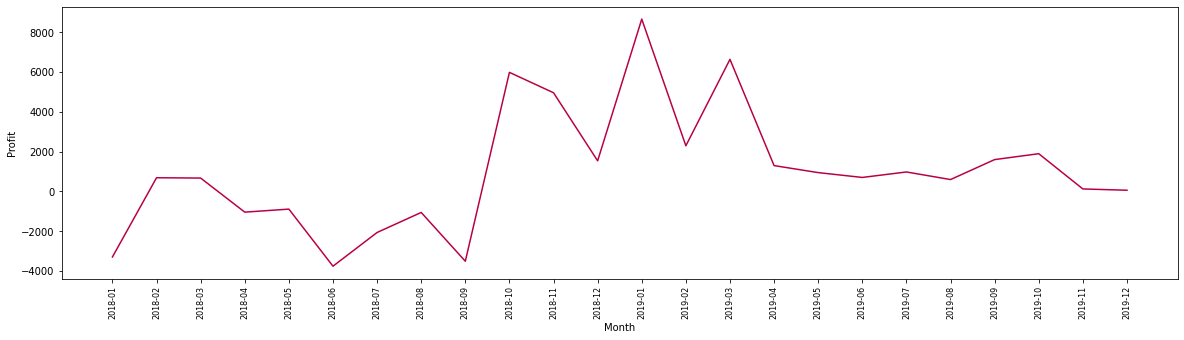

In [305]:


plt.figure(figsize=(20,5))
##groupbyDate.plot(kind = 'bar',
#    x = 'months',
 #       y = 'sum',
  #      color = 'red',ax =ax,figsize=(25, 6),title='Profit Vs Month',xlabel='months',ylabel='Profit')*/
plt.plot(groupbyDate['mnth_yr'],groupbyDate['sum'], color = '#b80045')
plt.xticks(groupbyDate['mnth_yr'], rotation='vertical', size = 8)
plt.ylabel('Profit')
plt.xlabel('Month')

In [306]:
groupbyDate['Last_Month'] = np.roll(groupbyDate['sum'],1)
groupbyDate['Growth'] = (groupbyDate['sum']/groupbyDate['Last_Month'])-1
groupbyDate.head()

,mnth_yr,sum,Last_Month,Growth
0,2018-01,-3296,57,-58.824561
1,2018-02,685,-3296,-1.207828
2,2018-03,669,685,-0.023358
3,2018-04,-1043,669,-2.559043
4,2018-05,-891,-1043,-0.145733


<AxesSubplot:title={'center':'Profit Vs Month'}, xlabel='mnth_yr', ylabel='Profit'>

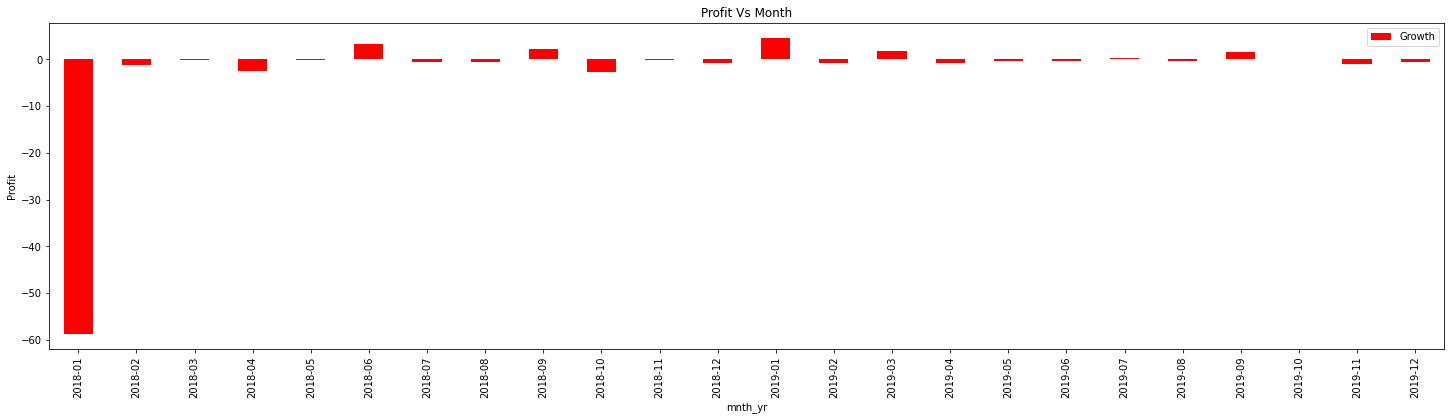

<Figure size 432x288 with 0 Axes>

In [307]:
ax = plt.gca()
fig = plt.figure()

groupbyDate.plot(kind = 'bar',
        x = 'mnth_yr',
        y = 'Growth',
                 
        color = 'red',ax =ax,figsize=(25, 6),title='Profit Vs Month',xlabel='mnth_yr',ylabel='Profit')


In [308]:
categoryGroup = profit2.groupby('Category')

categoryGroup = categoryGroup.Profit.agg([sum]).reset_index()
print(categoryGroup.rename(columns={'sum':'Profit'}))
categoryGroup['sum'].idxmin()

      Category  Profit
0     Clothing   11163
1  Electronics   10494
2    Furniture    2298


2

<AxesSubplot:title={'center':'Profit Vs Category'}, xlabel='Category', ylabel='Profit'>

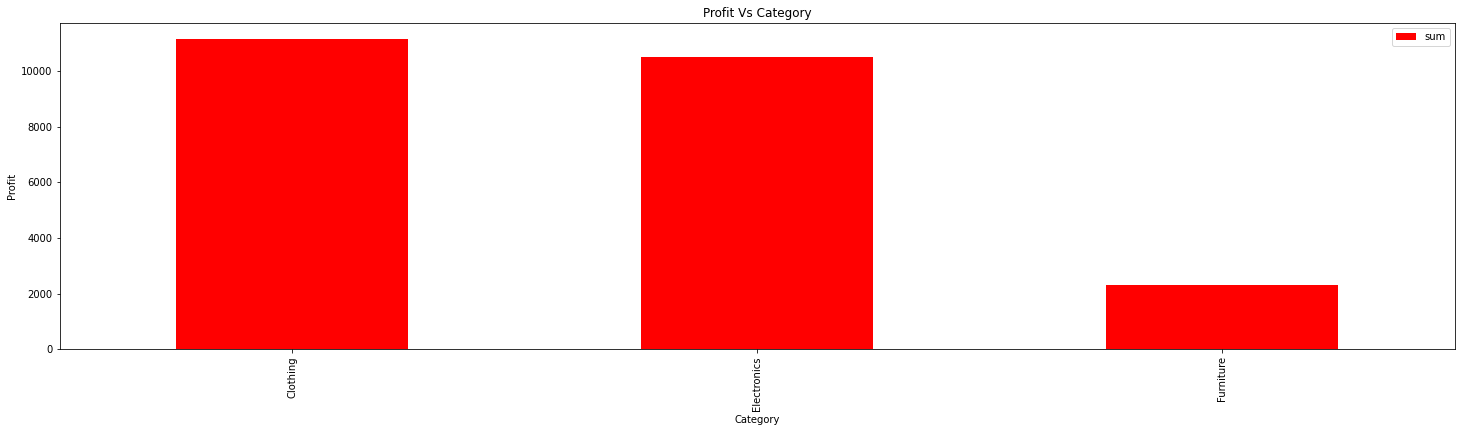

<Figure size 432x288 with 0 Axes>

In [309]:
ax = plt.gca()
fig = plt.figure()

categoryGroup.plot(kind = 'bar',
        x = 'Category',
        y = 'sum',      
        color = 'red',ax =ax,figsize=(25, 6),title='Profit Vs Category',xlabel='Category',ylabel='Profit')

In [310]:
subcategoryGroup = profit2.groupby(['Category','Sub-Category'])

subcategoryGroup = subcategoryGroup.Profit.agg([sum]).reset_index()
#subcategoryGroup.sort_values(by='Category')
print(subcategoryGroup.rename(columns={'sum':'Profit'}))
subcategoryGroup['sum'].idxmin()

       Category      Sub-Category  Profit
0      Clothing       Hankerchief    2098
1      Clothing             Kurti     181
2      Clothing          Leggings     260
3      Clothing             Saree     352
4      Clothing             Shirt    1131
5      Clothing             Skirt     235
6      Clothing             Stole    2559
7      Clothing           T-shirt    1500
8      Clothing          Trousers    2847
9   Electronics       Accessories    3559
10  Electronics  Electronic Games   -1236
11  Electronics            Phones    2207
12  Electronics          Printers    5964
13    Furniture         Bookcases    4888
14    Furniture            Chairs     577
15    Furniture       Furnishings     844
16    Furniture            Tables   -4011


16

<AxesSubplot:title={'center':'Profit Vs Category'}, xlabel='Sub-Category', ylabel='Profit'>

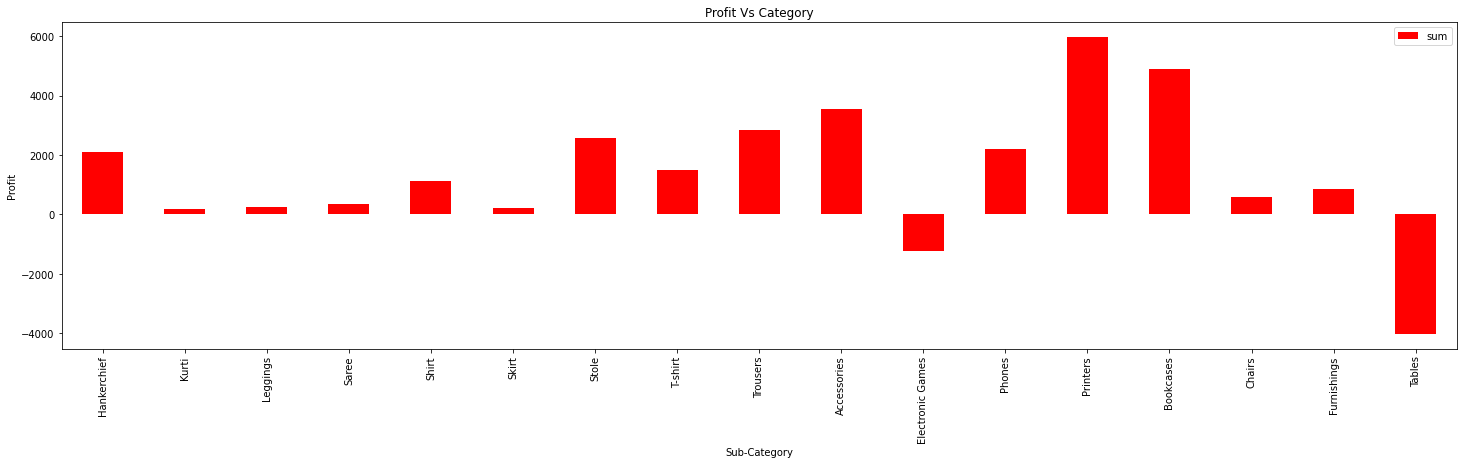

<Figure size 432x288 with 0 Axes>

In [311]:
ax = plt.gca()
fig = plt.figure()

subcategoryGroup.plot(kind = 'bar',
        x = 'Sub-Category',
        y = 'sum',      
        color = 'red',ax =ax,figsize=(25, 6),title='Profit Vs Category',xlabel='Sub-Category',ylabel='Profit')

In [312]:
groupbyDate2 = profit2.groupby(['Category'])
groupbyDate2= groupbyDate2.Profit.agg(['sum']).reset_index()
print(groupbyDate2)

      Category    sum
0     Clothing  11163
1  Electronics  10494
2    Furniture   2298


<AxesSubplot:title={'center':'Profit Vs Category'}, xlabel='Category', ylabel='Profit'>

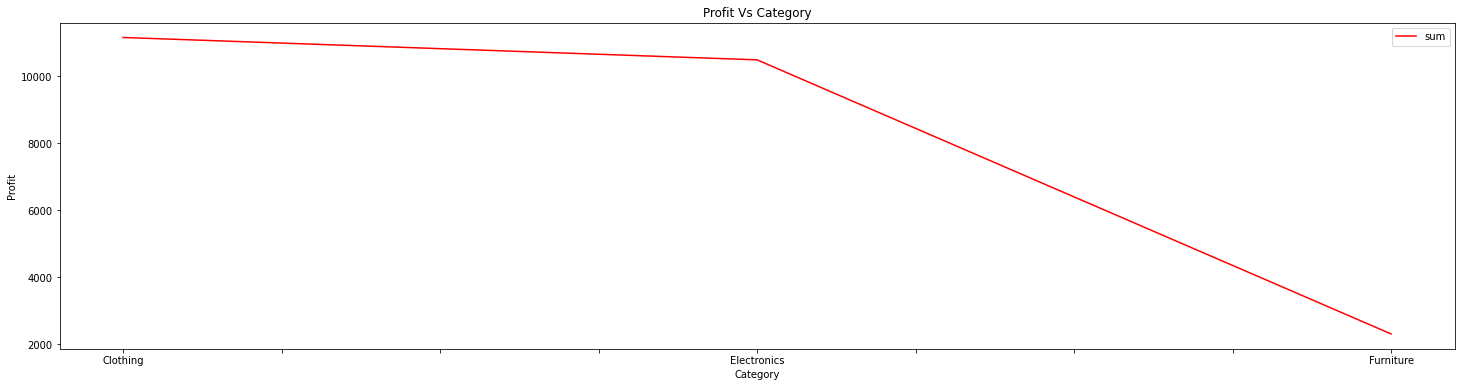

<Figure size 432x288 with 0 Axes>

In [313]:
ax = plt.gca()
fig = plt.figure()

groupbyDate2.plot(kind = 'line',
        x = 'Category',
        y = 'sum',      
        color = 'red',ax =ax,figsize=(25, 6),title='Profit Vs Category',xlabel='Category',ylabel='Profit')


<Figure size 432x288 with 0 Axes>

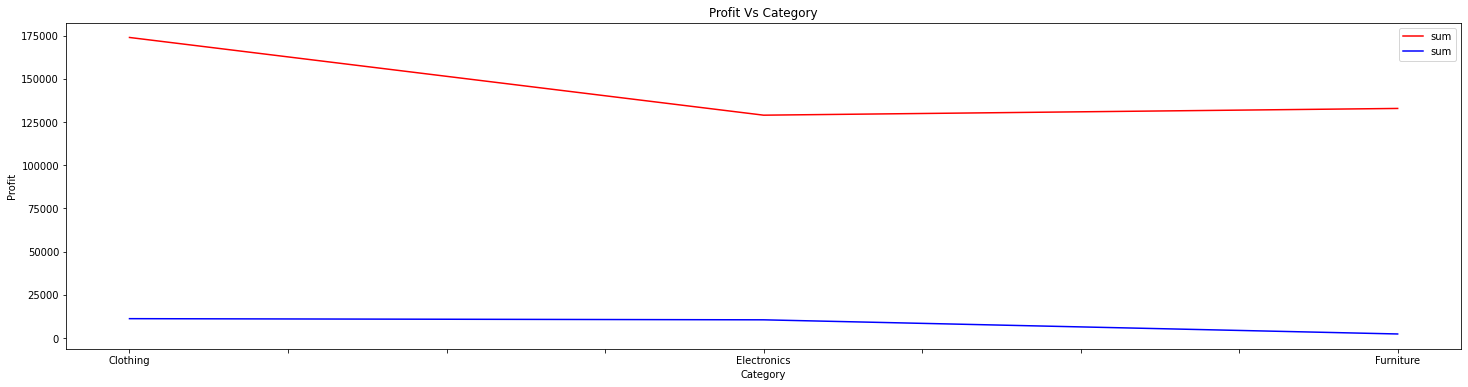

In [314]:


target['Month ofOrder Date'] = pd.to_datetime(target['Month of Order Date'])
target['mnth_yr'] = target['Month of Order Date'].apply(lambda x: x.strftime('%m-%d')) 
target.head()
target2 = target.groupby(['Category'])
target2 = target2.Target.agg(['sum']).reset_index()

fig = plt.figure()
ax = target2.plot(kind = 'line',
        x = 'Category',
        y = 'sum',      
        color = 'red',figsize=(25, 6),title='Profit Vs Category',xlabel='Category',ylabel='target')


groupbyDate2.plot(kind = 'line',
        x = 'Category',
        y = 'sum',      
        color = 'blue',ax =ax,figsize=(25, 6),title='Profit Vs Category',xlabel='Category',ylabel='Profit')

plt.show()
#target.plot(kind = 'line',x = 'category',y = )